In [7]:
from JIN_pylib import Data2D_XT, ProcessUtil
from imp import reload
from scipy.signal.windows import gaussian
reload(ProcessUtil)

<module 'JIN_pylib.ProcessUtil' from '/mnt/d/repository/JIN_pylib/ProcessUtil.py'>

In [288]:
data = np.zeros((100,1000))
dt = 0.001
dx = 1

v = 1500
dists = np.arange(data.shape[0])*dx
taxis = np.arange(data.shape[1])*dt

src_wav = gaussian(1000,2)

t_arrival = dists/v-0.3

for ichan in range(data.shape[0]):
    data[ichan,:] = np.interp(taxis,taxis+t_arrival[ichan],src_wav)
    
v = 1500
t_arrival = dists/v-0.4

for ichan in range(data.shape[0]):
    data[ichan,:] += np.interp(taxis,taxis+t_arrival[ichan],src_wav)



In [289]:
DASdata = Data2D_XT.Data2D()
DASdata.taxis = taxis
DASdata.mds = dists
DASdata.data = data

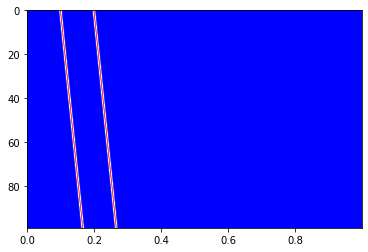

In [290]:
plt.figure()
DASdata.plot_waterfall()
plt.show()

In [291]:
reload(ProcessUtil)

f_array = np.linspace(1,200,200)
v_array = np.linspace(1000,4000,200)

disp_result = ProcessUtil.disp_analysis(DASdata,v_array,f_array,upward=False)

In [292]:
disp_result.keys()

dict_keys(['semb_mat', 'norm_semb_mat', 'v_array', 'input_f_array', 'f_array'])

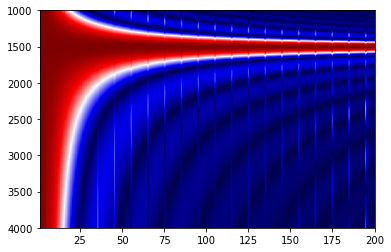

In [293]:
plt.figure()
ProcessUtil.plot_disp_result(disp_result)
plt.show()